In [1]:
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

_ = sns.set(style="darkgrid", palette="colorblind")

In [2]:
def smooth(y, radius, mode='two_sided', valid_only=False):
    '''
    Smooth signal y, where radius is determines the size of the window

    mode='twosided':
        average over the window [max(index - radius, 0), min(index + radius, len(y)-1)]
    mode='causal':
        average over the window [max(index - radius, 0), index]

    valid_only: put nan in entries where the full-sized window is not available

    '''
    assert mode in ('two_sided', 'causal')
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        out = np.convolve(y, convkernel,mode='same') / np.convolve(np.ones_like(y), convkernel, mode='same')
        if valid_only:
            out[:radius] = out[-radius:] = np.nan
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / np.convolve(np.ones_like(y), convkernel, mode='full')
        out = out[:-radius+1]
        if valid_only:
            out[:radius] = np.nan
    return out

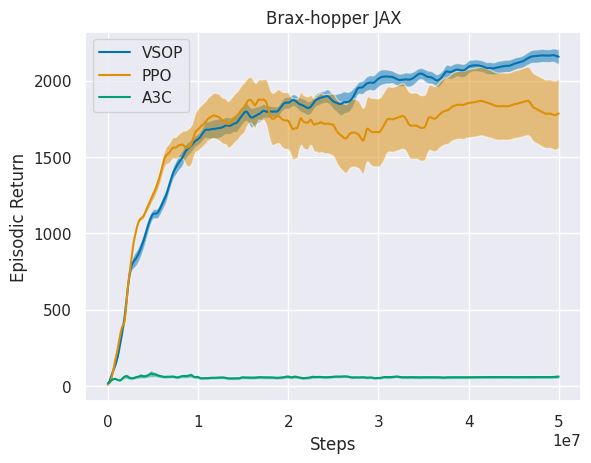

In [3]:
base_dir = Path().resolve() / "output"
env = "Brax-hopper"

ppo_path = base_dir / f"{env}/ppo/"
ppo_returns = np.load(ppo_path / "returns.npy")
ppo_config = json.load(open(ppo_path / "config.json"))

for i in range(ppo_returns.shape[0]):
    ppo_returns[i] = smooth(ppo_returns[i], radius=100)

vsop_path = base_dir / f"{env}/vsop/"
vsop_returns = np.load(vsop_path / "returns.npy")
vsop_config = json.load(open(vsop_path / "config.json"))

for i in range(vsop_returns.shape[0]):
    vsop_returns[i] = smooth(vsop_returns[i], radius=100)

a2c_path = base_dir / f"{env}/a3c/"
a2c_returns = np.load(a2c_path / "returns.npy")
a2c_config = json.load(open(a2c_path / "config.json"))

for i in range(a2c_returns.shape[0]):
    a2c_returns[i] = smooth(a2c_returns[i], radius=100)

plt.plot(np.arange(vsop_returns.shape[-1]) * vsop_config["NUM_ENVS"], vsop_returns.mean(0), label="VSOP", c="C0")
plt.plot(np.arange(ppo_returns.shape[-1]) * ppo_config["NUM_ENVS"], ppo_returns.mean(0), label="PPO", c="C1")
plt.plot(np.arange(a2c_returns.shape[-1]) * a2c_config["NUM_ENVS"], a2c_returns.mean(0), label="A3C", c="C2")


plt.fill_between(
    x=np.arange(vsop_returns.shape[-1]) * vsop_config["NUM_ENVS"], 
    y1=vsop_returns.mean(0) + stats.sem(vsop_returns), 
    y2=vsop_returns.mean(0) - stats.sem(vsop_returns), 
    alpha=0.5,
)
plt.fill_between(
    x=np.arange(ppo_returns.shape[-1]) * ppo_config["NUM_ENVS"], 
    y1=ppo_returns.mean(0) + stats.sem(ppo_returns), 
    y2=ppo_returns.mean(0) - stats.sem(ppo_returns), 
    alpha=0.5,
)
plt.fill_between(
    x=np.arange(a2c_returns.shape[-1]) * a2c_config["NUM_ENVS"], 
    y1=a2c_returns.mean(0) + stats.sem(a2c_returns), 
    y2=a2c_returns.mean(0) - stats.sem(a2c_returns),    
    alpha=0.5,
)

plt.xlabel("Steps")
plt.ylabel("Episodic Return")
plt.title(f"{ppo_config['ENV_NAME']} JAX")
plt.legend()
plt.savefig(base_dir / f"{ppo_config['ENV_NAME']}" / f"{ppo_config['ENV_NAME']}.png")

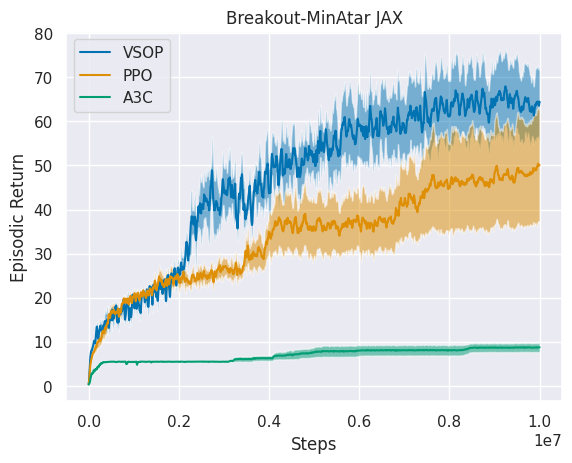

In [4]:
base_dir = Path().resolve() / "output"
env = "Breakout-MinAtar"

ppo_path = base_dir / f"{env}/ppo/"
ppo_returns = np.load(ppo_path / "returns.npy")
ppo_config = json.load(open(ppo_path / "config.json"))

for i in range(ppo_returns.shape[0]):
    ppo_returns[i] = smooth(ppo_returns[i], radius=100)

vsop_path = base_dir / f"{env}/vsop/"
vsop_returns = np.load(vsop_path / "returns.npy")
vsop_config = json.load(open(vsop_path / "config.json"))

for i in range(vsop_returns.shape[0]):
    vsop_returns[i] = smooth(vsop_returns[i], radius=100)

a2c_path = base_dir / f"{env}/a3c/"
a2c_returns = np.load(a2c_path / "returns.npy")
a2c_config = json.load(open(a2c_path / "config.json"))

for i in range(a2c_returns.shape[0]):
    a2c_returns[i] = smooth(a2c_returns[i], radius=100)

plt.plot(np.arange(vsop_returns.shape[-1]) * vsop_config["NUM_ENVS"], vsop_returns.mean(0), label="VSOP", c="C0")
plt.plot(np.arange(ppo_returns.shape[-1]) * ppo_config["NUM_ENVS"], ppo_returns.mean(0), label="PPO", c="C1")
plt.plot(np.arange(a2c_returns.shape[-1]) * a2c_config["NUM_ENVS"], a2c_returns.mean(0), label="A3C", c="C2")


plt.fill_between(
    x=np.arange(vsop_returns.shape[-1]) * vsop_config["NUM_ENVS"], 
    y1=vsop_returns.mean(0) + stats.sem(vsop_returns), 
    y2=vsop_returns.mean(0) - stats.sem(vsop_returns), 
    alpha=0.5,
)
plt.fill_between(
    x=np.arange(ppo_returns.shape[-1]) * ppo_config["NUM_ENVS"], 
    y1=ppo_returns.mean(0) + stats.sem(ppo_returns), 
    y2=ppo_returns.mean(0) - stats.sem(ppo_returns), 
    alpha=0.5,
)
plt.fill_between(
    x=np.arange(a2c_returns.shape[-1]) * a2c_config["NUM_ENVS"], 
    y1=a2c_returns.mean(0) + stats.sem(a2c_returns), 
    y2=a2c_returns.mean(0) - stats.sem(a2c_returns),    
    alpha=0.5,
)

plt.xlabel("Steps")
plt.ylabel("Episodic Return")
plt.title(f"{ppo_config['ENV_NAME']} JAX")
plt.legend()
plt.savefig(base_dir / f"{ppo_config['ENV_NAME']}" / f"{ppo_config['ENV_NAME']}.png")

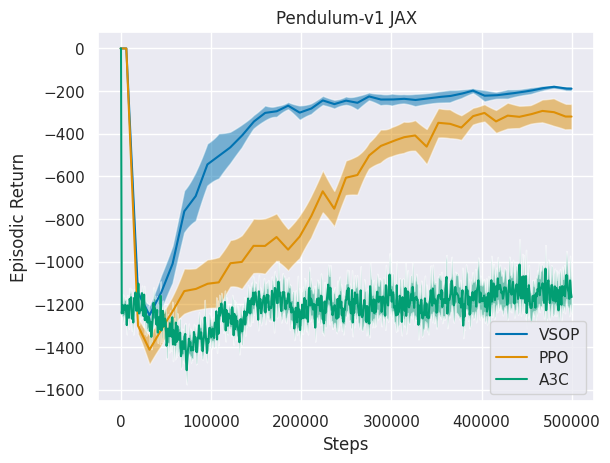

In [5]:
base_dir = Path().resolve() / "output"
env = "Pendulum-v1"

ppo_path = base_dir / f"{env}/ppo/"
ppo_returns = np.load(ppo_path / "returns.npy")
ppo_config = json.load(open(ppo_path / "config.json"))

for i in range(ppo_returns.shape[0]):
    ppo_returns[i] = smooth(ppo_returns[i], radius=100)

vsop_path = base_dir / f"{env}/vsop/"
vsop_returns = np.load(vsop_path / "returns.npy")
vsop_config = json.load(open(vsop_path / "config.json"))

for i in range(vsop_returns.shape[0]):
    vsop_returns[i] = smooth(vsop_returns[i], radius=100)

a2c_path = base_dir / f"{env}/a3c/"
a2c_returns = np.load(a2c_path / "returns.npy")
a2c_config = json.load(open(a2c_path / "config.json"))

for i in range(a2c_returns.shape[0]):
    a2c_returns[i] = smooth(a2c_returns[i], radius=100)

plt.plot(np.arange(vsop_returns.shape[-1]) * vsop_config["NUM_ENVS"], vsop_returns.mean(0), label="VSOP", c="C0")
plt.plot(np.arange(ppo_returns.shape[-1]) * ppo_config["NUM_ENVS"], ppo_returns.mean(0), label="PPO", c="C1")
plt.plot(np.arange(a2c_returns.shape[-1]) * a2c_config["NUM_ENVS"], a2c_returns.mean(0), label="A3C", c="C2")


plt.fill_between(
    x=np.arange(vsop_returns.shape[-1]) * vsop_config["NUM_ENVS"], 
    y1=vsop_returns.mean(0) + stats.sem(vsop_returns), 
    y2=vsop_returns.mean(0) - stats.sem(vsop_returns), 
    alpha=0.5,
)
plt.fill_between(
    x=np.arange(ppo_returns.shape[-1]) * ppo_config["NUM_ENVS"], 
    y1=ppo_returns.mean(0) + stats.sem(ppo_returns), 
    y2=ppo_returns.mean(0) - stats.sem(ppo_returns), 
    alpha=0.5,
)
plt.fill_between(
    x=np.arange(a2c_returns.shape[-1]) * a2c_config["NUM_ENVS"], 
    y1=a2c_returns.mean(0) + stats.sem(a2c_returns), 
    y2=a2c_returns.mean(0) - stats.sem(a2c_returns),    
    alpha=0.5,
)

plt.xlabel("Steps")
plt.ylabel("Episodic Return")
plt.title(f"{ppo_config['ENV_NAME']} JAX")
plt.legend()
plt.savefig(base_dir / f"{ppo_config['ENV_NAME']}" / f"{ppo_config['ENV_NAME']}.png")